# Basic uses of SOMPY library
http://www.vahidmoosavi.com


https://github.com/sevamoo/sompy


In [2]:
!git clone https://github.com/hhl60492/SOMPY_robust_clustering.git
%cd SOMPY_robust_clustering
! python setup.py install

Cloning into 'SOMPY_robust_clustering'...
remote: Enumerating objects: 185, done.
remote: Total 185 (delta 0), reused 0 (delta 0), pack-reused 185
Receiving objects: 100% (185/185), 1.66 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/SOMPY_robust_clustering
running install
running bdist_egg
running egg_info
writing requirements to SOMPY.egg-info/requires.txt
writing SOMPY.egg-info/PKG-INFO
writing top-level names to SOMPY.egg-info/top_level.txt
writing dependency_links to SOMPY.egg-info/dependency_links.txt
writing manifest file 'SOMPY.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sompy
copying build/lib.linux-x86_64-2.7/sompy/sompy.py -> build/bdist.linux-x86_64/egg/sompy
copying build/lib.linux-x86_64-2.7/sompy/neighborhood.py -> build/bdist.linux-x86_64/egg/sompy
creating build/bdist

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


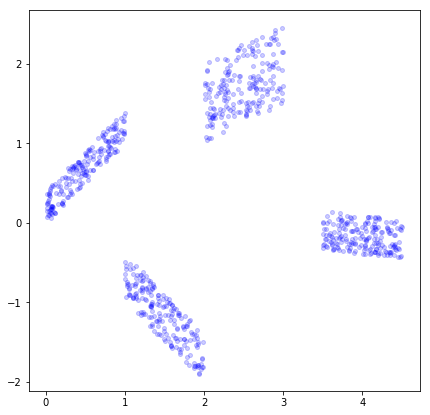

In [4]:
### A toy example: two dimensional data, four clusters

dlen = 200
Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]


Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]


Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]


Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)




In [5]:

mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
 pca_linear_initialization took: 0.025000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 15

 epoch: 1 ---> elapsed time:  0.120000, quantization error: 0.230453

 epoch: 2 ---> elapsed time:  0.111000, quantization error: 0.115853

 epoch: 3 ---> elapsed time:  0.108000, quantization error: 0.080106

 epoch: 4 ---> elapsed time:  0.107000, quantization error: 0.075801

 epoch: 5 ---> elapsed time:  0.107000, quantization error: 0.071296

 epoch: 6 ---> elapsed time:  0.107000, quantization error: 0.064816

 epoch: 7 ---> elapsed time:  0.107000, quantization error: 0.061319

 epoch: 8 ---> elapsed time:  0.107000, quantization error: 0.057169

 epoch: 9 ---> elapsed time:  0.107000, quantization error: 0.053699

 epoch: 10 ---> elapsed time:  0.107000, quantization error: 0.050271

 epoch: 11 ---> elapsed time:  0.107000, quantization error: 0.047046

 epoch: 12 ---> elapsed time:  0.107000, quantization error: 0.043673

 epoch: 13 --

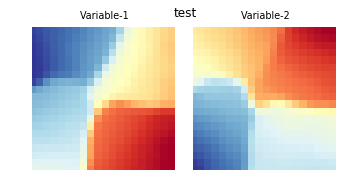

In [6]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

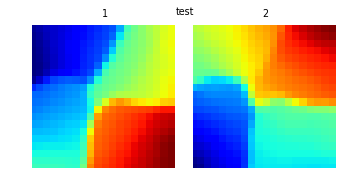

In [7]:
som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default


In [8]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

Performing K-means SSE elbow sweep...
Working on bootstrap sample 0 K: 2
Working on bootstrap sample 1 K: 2
Working on bootstrap sample 2 K: 2
Working on bootstrap sample 3 K: 2
Working on bootstrap sample 4 K: 2
Working on bootstrap sample 5 K: 2
Working on bootstrap sample 6 K: 2
Working on bootstrap sample 7 K: 2
Working on bootstrap sample 8 K: 2
Working on bootstrap sample 9 K: 2
Working on bootstrap sample 10 K: 2
Working on bootstrap sample 11 K: 2
Working on bootstrap sample 12 K: 2
Working on bootstrap sample 13 K: 2
Working on bootstrap sample 14 K: 2
Working on bootstrap sample 15 K: 2
Working on bootstrap sample 16 K: 2
Working on bootstrap sample 17 K: 2
Working on bootstrap sample 18 K: 2
Working on bootstrap sample 19 K: 2
Working on bootstrap sample 0 K: 3
Working on bootstrap sample 1 K: 3
Working on bootstrap sample 2 K: 3
Working on bootstrap sample 3 K: 3
Working on bootstrap sample 4 K: 3
Working on bootstrap sample 5 K: 3
Working on bootstrap sample 6 K: 3
Working

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


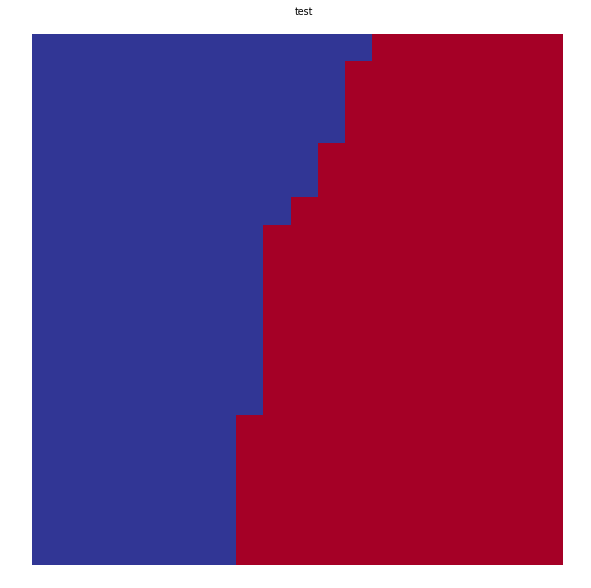

In [9]:
v.show(som, what='cluster')

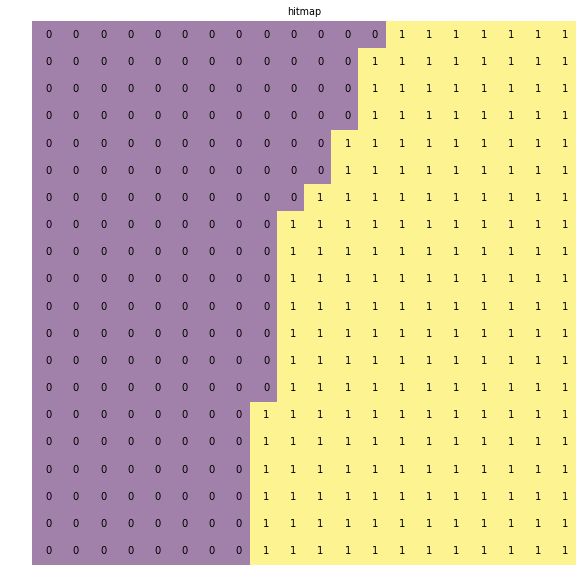

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       ...,
       [ 19,  17, 397],
       [ 19,  18, 398],
       [ 19,  19, 399]])

In [10]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

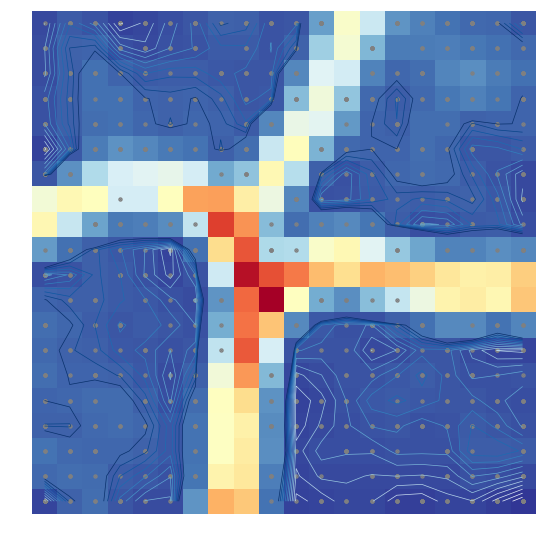

In [11]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


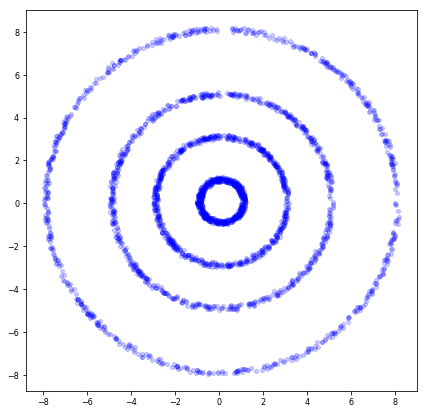

In [12]:
dlen = 700
tetha = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]
X1 = 3*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data1 = np.concatenate((X1,Y1),axis=1)

X2 = 1*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data2 = np.concatenate((X2,Y2),axis=1)

X3 = 5*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data3 = np.concatenate((X3,Y3),axis=1)

X4 = 8*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data4 = np.concatenate((X4,Y4),axis=1)



Data2 = np.concatenate((Data1,Data2,Data3,Data4),axis=0)

fig = plt.figure()
plt.plot(Data2[:,0],Data2[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)
# plt.plot(np.cos(tetha))

In [13]:

mapsize = [30,30]
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
 pca_linear_initialization took: 0.013000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.131000, quantization error: 0.356264

 epoch: 2 ---> elapsed time:  0.128000, quantization error: 0.224264

 epoch: 3 ---> elapsed time:  0.129000, quantization error: 0.186393

 epoch: 4 ---> elapsed time:  0.127000, quantization error: 0.166170

 epoch: 5 ---> elapsed time:  0.127000, quantization error: 0.142738

 epoch: 6 ---> elapsed time:  0.128000, quantization error: 0.120795

 epoch: 7 ---> elapsed time:  0.127000, quantization error: 0.097519

 epoch: 8 ---> elapsed time:  0.127000, quantization error: 0.076406

 epoch: 9 ---> elapsed time:  0.127000, quantization error: 0.057051

 epoch: 10 ---> elapsed time:  0.128000, quantization error: 0.038873

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 13

 epoch: 1 ---> elapsed time:  0.129000, quantization error: 0.027807

 

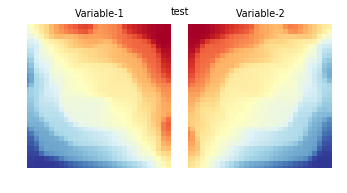

In [14]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

Performing K-means SSE elbow sweep...
Working on bootstrap sample 0 K: 2
Working on bootstrap sample 1 K: 2
Working on bootstrap sample 2 K: 2
Working on bootstrap sample 3 K: 2
Working on bootstrap sample 4 K: 2
Working on bootstrap sample 5 K: 2
Working on bootstrap sample 6 K: 2
Working on bootstrap sample 7 K: 2
Working on bootstrap sample 8 K: 2
Working on bootstrap sample 9 K: 2
Working on bootstrap sample 10 K: 2
Working on bootstrap sample 11 K: 2
Working on bootstrap sample 12 K: 2
Working on bootstrap sample 13 K: 2
Working on bootstrap sample 14 K: 2
Working on bootstrap sample 15 K: 2
Working on bootstrap sample 16 K: 2
Working on bootstrap sample 17 K: 2
Working on bootstrap sample 18 K: 2
Working on bootstrap sample 19 K: 2
Working on bootstrap sample 0 K: 3
Working on bootstrap sample 1 K: 3
Working on bootstrap sample 2 K: 3
Working on bootstrap sample 3 K: 3
Working on bootstrap sample 4 K: 3
Working on bootstrap sample 5 K: 3
Working on bootstrap sample 6 K: 3
Working

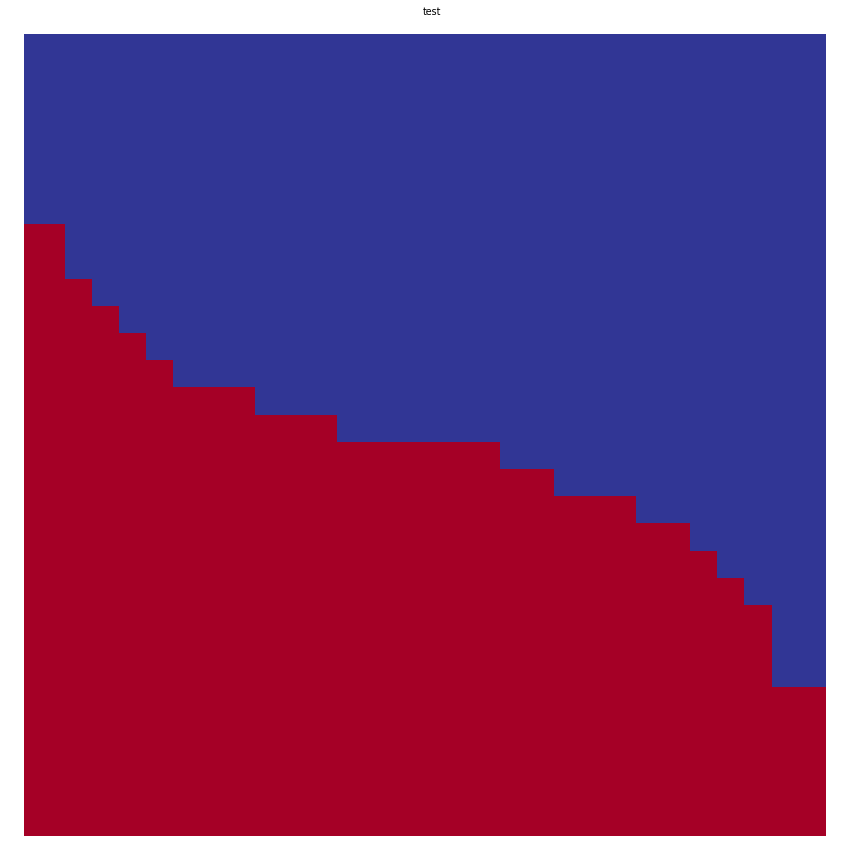

In [15]:
#In this case, K-means simply fails as expected

v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
v.show(som, what='cluster')
# v.save('kmeans_test')

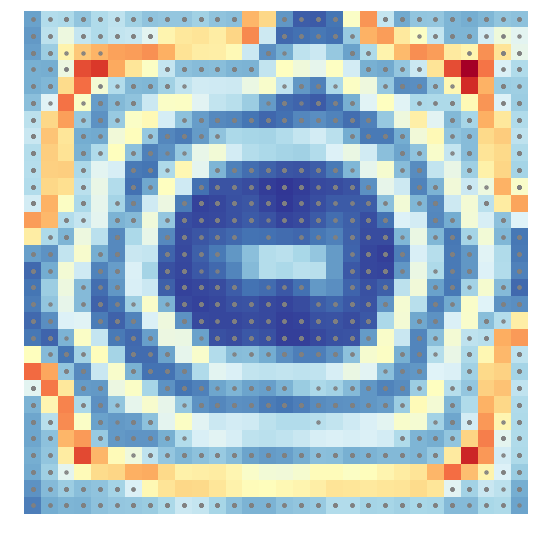

In [16]:
#But Umatrix finds the clusters easily

u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)
